In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/alexa.com_site_info.csv')

In [3]:
df = df.dropna()

In [4]:
df.columns

Index(['site link', 'category',
       'keyword_opportunities_breakdown_optimization_opportunities',
       'keyword_opportunities_breakdown_keyword_gaps',
       'keyword_opportunities_breakdown_easy_to_rank_keywords',
       'keyword_opportunities_breakdown_buyer_keywords',
       'all_topics_keyword_gaps_name_parameter_1',
       'all_topics_keyword_gaps_name_parameter_2',
       'all_topics_keyword_gaps_name_parameter_3',
       'all_topics_keyword_gaps_name_parameter_4',
       'all_topics_keyword_gaps_Avg_traffic_parameter_1',
       'all_topics_keyword_gaps_Avg_traffic_parameter_2',
       'all_topics_keyword_gaps_Avg_traffic_parameter_3',
       'all_topics_keyword_gaps_Avg_traffic_parameter_4',
       'all_topics_keyword_gaps_search_popularity_parameter_1',
       'all_topics_keyword_gaps_search_popularity_parameter_2',
       'all_topics_keyword_gaps_search_popularity_parameter_3',
       'all_topics_keyword_gaps_search_popularity_parameter_4',
       'all_topics_easy_to_rank

In [5]:
cols3 = ['all_topics_easy_to_rank_keywords_search_pop_parameter_1',
       'all_topics_easy_to_rank_keywords_search_pop_parameter_2',
       'all_topics_easy_to_rank_keywords_search_pop_parameter_3',
       'all_topics_easy_to_rank_keywords_search_pop_parameter_4']
cols2 = ['all_topics_easy_to_rank_keywords_relevance_to_site_parameter_1',
       'all_topics_easy_to_rank_keywords_relevance_to_site_parameter_2',
       'all_topics_easy_to_rank_keywords_relevance_to_site_parameter_3',
       'all_topics_easy_to_rank_keywords_relevance_to_site_parameter_4',]
cols4 = ['all_topics_keyword_gaps_Avg_traffic_parameter_1',
       'all_topics_keyword_gaps_Avg_traffic_parameter_2',
       'all_topics_keyword_gaps_Avg_traffic_parameter_3',
       'all_topics_keyword_gaps_Avg_traffic_parameter_4']
cols5 = ['all_topics_keyword_gaps_search_popularity_parameter_1',
       'all_topics_keyword_gaps_search_popularity_parameter_2',
       'all_topics_keyword_gaps_search_popularity_parameter_3',
       'all_topics_keyword_gaps_search_popularity_parameter_4']
df.loc[:,'all_topics_easy_to_rank_relevance_to_site_average'] = df.loc[:, cols2].mean(axis=1)
df.loc[:,'all_topics_easy_to_rank_keywords_search_pop_average'] = df.loc[:, cols3].mean(axis=1)
df.loc[:,'all_topics_keyword_gaps_Avg_traffic_average'] = df.loc[:, cols4].mean(axis=1)
df.loc[:,'all_topics_keyword_gaps_search_popularity_average'] = df.loc[:, cols5].mean(axis=1)

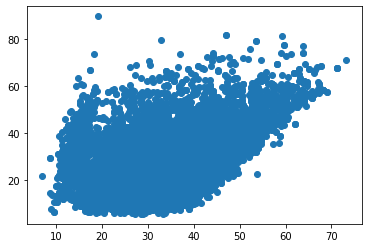

In [6]:
plt.scatter(df['all_topics_keyword_gaps_Avg_traffic_average'].to_numpy(),
           df['all_topics_keyword_gaps_search_popularity_average'].to_numpy())
plt.show()

In [7]:
from sklearn.cluster import OPTICS
model = OPTICS(max_eps=3, min_samples=60)
yhat = model.fit_predict(df[['all_topics_keyword_gaps_Avg_traffic_average', 
                              'all_topics_keyword_gaps_search_popularity_average']].to_numpy())
clusters = np.unique(yhat)


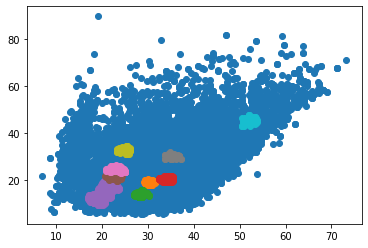

10

In [8]:
X = df[['all_topics_keyword_gaps_Avg_traffic_average', 
                              'all_topics_keyword_gaps_search_popularity_average']].to_numpy()
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()
len(clusters)

In [59]:
df[['all_topics_easy_to_rank_keywords_search_pop_average', 
                              'all_topics_easy_to_rank_relevance_to_site_average']].to_numpy()[[1,2,3]]

array([[28.75, 53.75],
       [16.75, 52.  ],
       [45.  , 64.  ]])

In [82]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

KeyboardInterrupt: 